In [1]:
import sys
sys.path.append("..")

In [2]:
import torch

from src.datikz_data import DatikzCaptionDataset, collate_fn
from src.utils import load_model, generate_captions

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
#model_path = "/taiga/LLaVa-FT-datikz/outputs/llava-datikz-lora/llava-datikz-full"
model_path = "llava-hf/llava-1.5-7b-hf"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, processor = load_model(model_path)
model = model.to(device)
model.eval()

[info] Loading model from 'llava-hf/llava-1.5-7b-hf' to device cuda:0...


Loading checkpoint shards: 100%|██████████| 3/3 [00:19<00:00,  6.51s/it]


[info] Loading processor (use_fast=True)...
✅ Model and processor loaded successfully!


LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Q

In [4]:
dataset = DatikzCaptionDataset(split="test")

✅ DatikzCaptionDataset initialized with 4830 samples for split 'test'


In [25]:
sample_idx = 6

image = dataset[sample_idx]["image"]
label = dataset[sample_idx]["caption"]

print(label)

(left) Automata for formulae: a) [true^*] c^*end, b) true^*; c;true^*end(right) A grid world modeled as an RDP


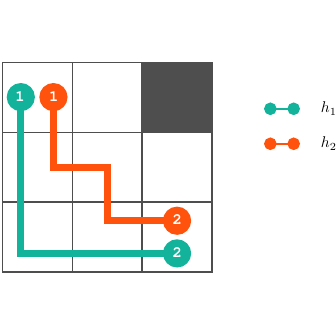

In [23]:
image

In [28]:
preds = generate_captions(model, processor, image, device)

print(preds[0])

USER:  
Please describe this image. ASSISTANT: The image features a large, colorful grid with various numbers and symbols. The grid is filled with a combination of numbers, letters, and arrows, creating a visually engaging and complex pattern. The grid is divided into multiple sections, each containing different elements.

In addition to the grid, there are two small arrows located at the top right corner of the image, possibly indicating the direction or orientation of the grid. The overall composition of the image is intricate and visually appealing.
